In [248]:
import networkx as nx
import pandas as pd
import numpy as np
from numpy.random import randint
from scipy.io import loadmat
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from IPython.display import Image



InteractiveShell.ast_node_interactivity = "all"

## Atabey's Notes

- Q1: Looks fine. (33/33)
- Q2: I liked the test function and the detailed report it returns. Well done. However, the metric for the first part is wrong. (24/33)
- Q3: Nicely done! This was an open ended question. You analyzed your results with the limited information you had. Well done! (33/33)

# HW1

## Eren Tümkaya - 090190328

## Q1

Consider the wheel graph on 7 vertices below. Assume each triangle is equilateral, or use [the graph distance](https://mathworld.wolfram.com/GraphDistance.html).

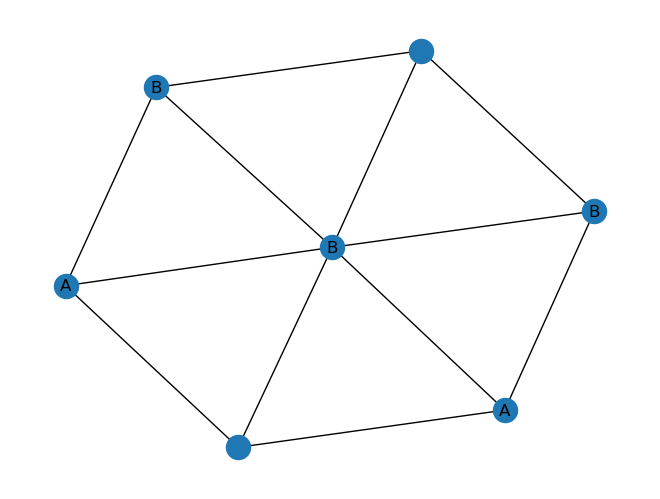

In [28]:
G = nx.wheel_graph(7)
pos = nx.spring_layout(G)
nx.draw(G,pos)
labels = {x: y for x,y in enumerate(['B','A','B','','B','A',''])}
res = nx.draw_networkx_labels(G,pos,labels)

1. Apply the k-NN algorithm by hand with $k=1$ to fill-in the missing labels. You must explain why you gave the specific label.
   
2. This time apply the k-NN by hand again with $k=3$ to fill-in the missing labels. Again, you must explain why you gave the specific label.

3. Apply k-means algorithm by hand with k=2. Use the unlabeled points as the initial centroids.

4. What happens with the central vertex? What are the centroids after the first run? Notice that if we randomly assign the central vertex, it affects the subsequent iterations.

5. Verify that iterations stabilize after first run.

6. What happens if we change the initial centroids? Explain.

### 1) k-NN by Hand (k=1)

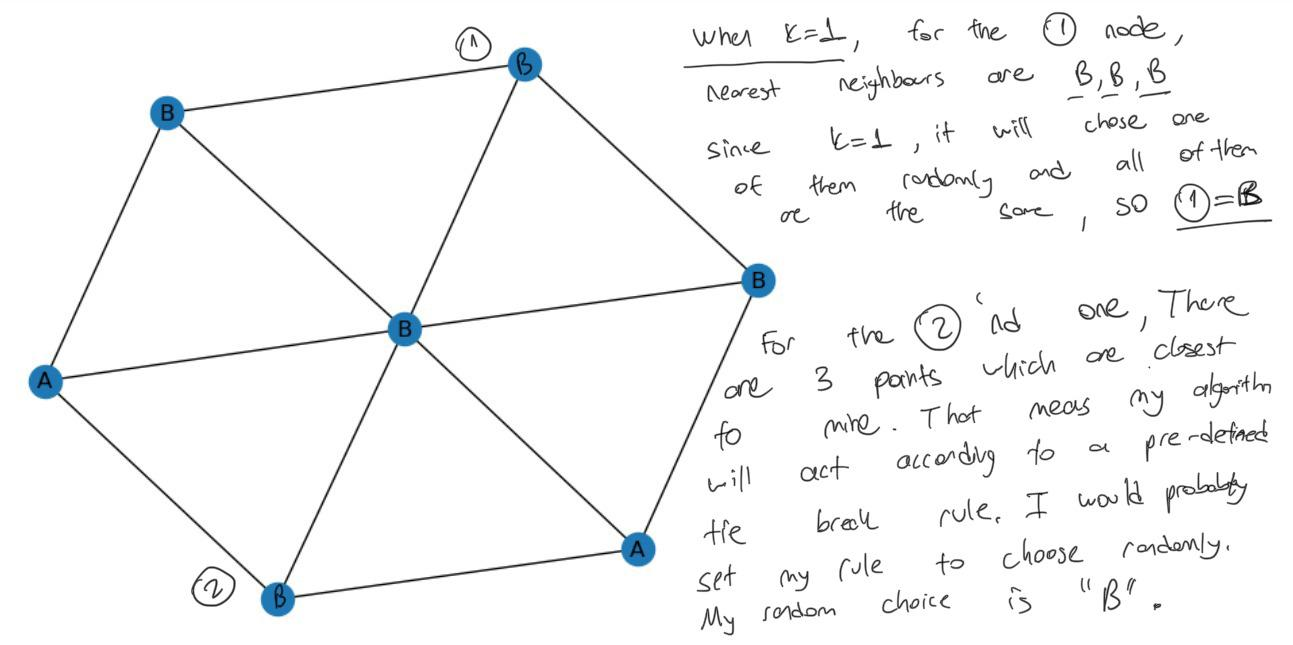

In [249]:
image_path = 'Photos/hw1_question1.jpg'
Image(filename=image_path)

### 2) k-NN by Hand (k=3)

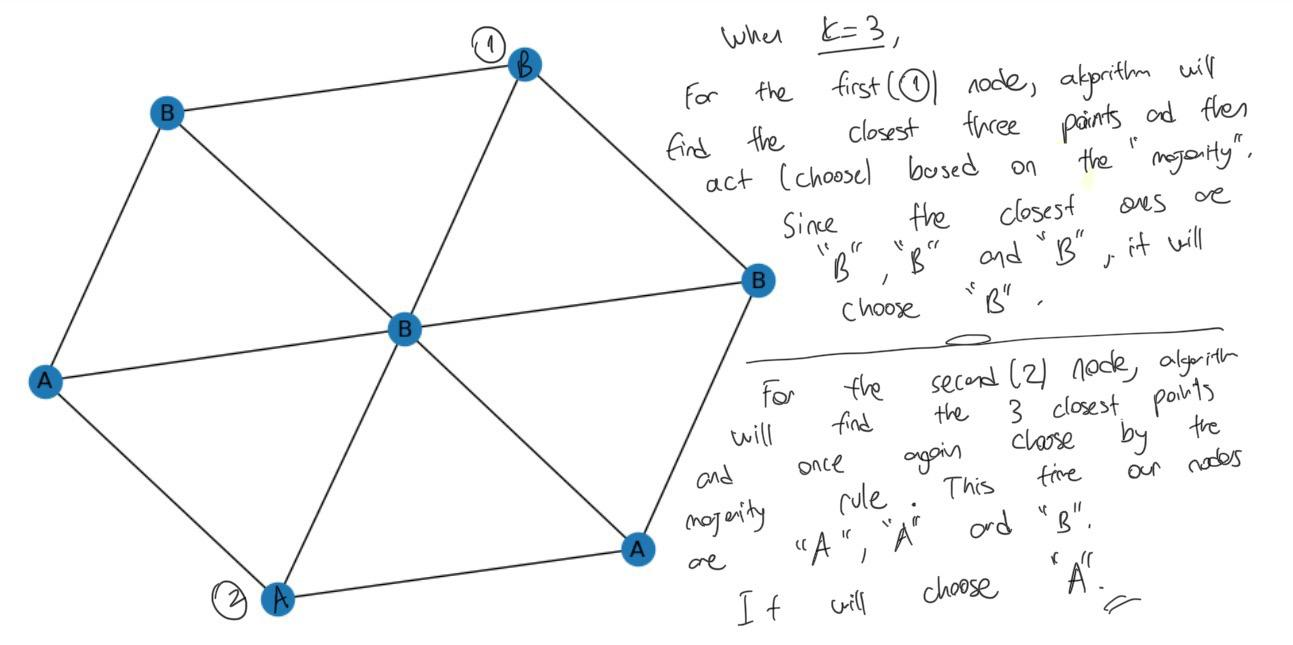

In [250]:
image_path = 'Photos/hw1_question1_2.jpg'
Image(filename=image_path)

### 3-4-5) K-Means by Hand (k=2)

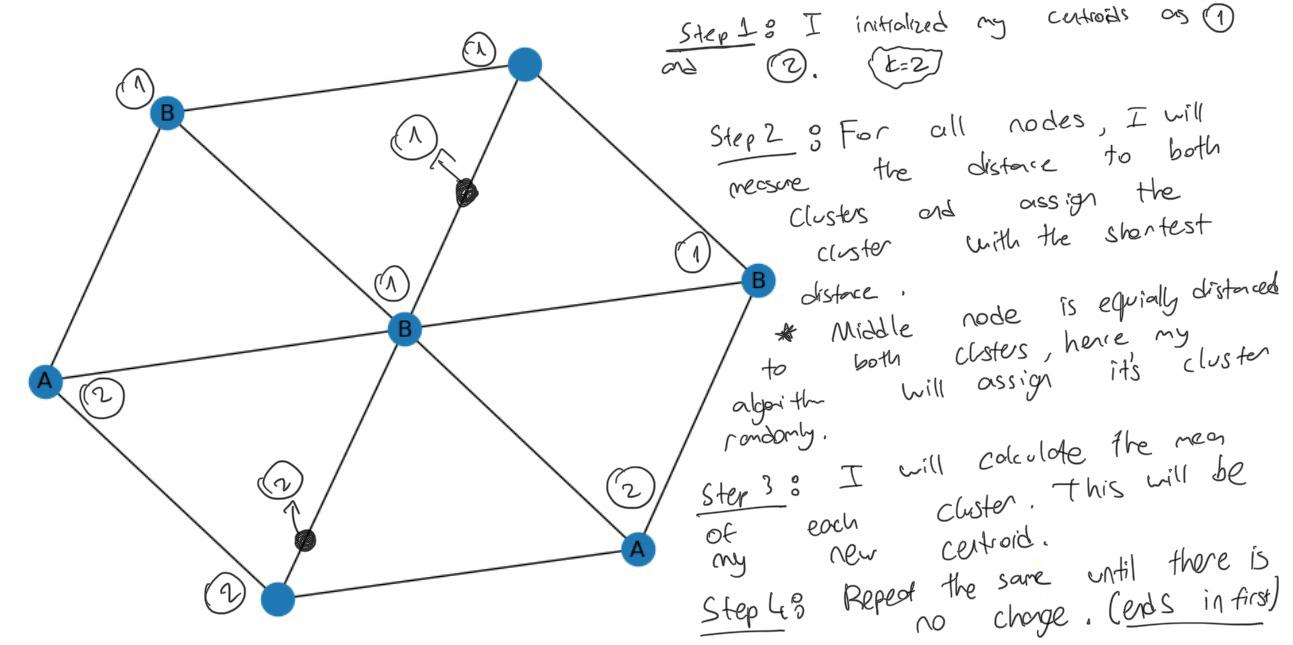

In [251]:
image_path = 'Photos/hw1_question1_3.jpg'
Image(filename=image_path)

** As I mentioned in my steps, central vertex is equidistant to both clusters and my algorithm assigned it randomly to the "1 cluster".  

I tried to draw a close approximation on where the centroids will be after the first run.  

Of course I acknowledge the fact that it would have ended with different clusters if I had assigned my central vertex to the other cluster.  

In order to verify that it ends in the first iteration, we can look at the final drawing I had and try to apply the same algorithm once again. It would clearly result in no change to the labels of the clusters, therefore it is easy to deduce that the results stabilize after the first run.



### 6) Changing the Initial Centroids

Thanks to the class we had, readings I went over ,and exercises I did on this notebook I had a confident guess on changing the initial centroids may impact the output.  

Now I will try to show that by choosing two different initial centroids on the very same graph.

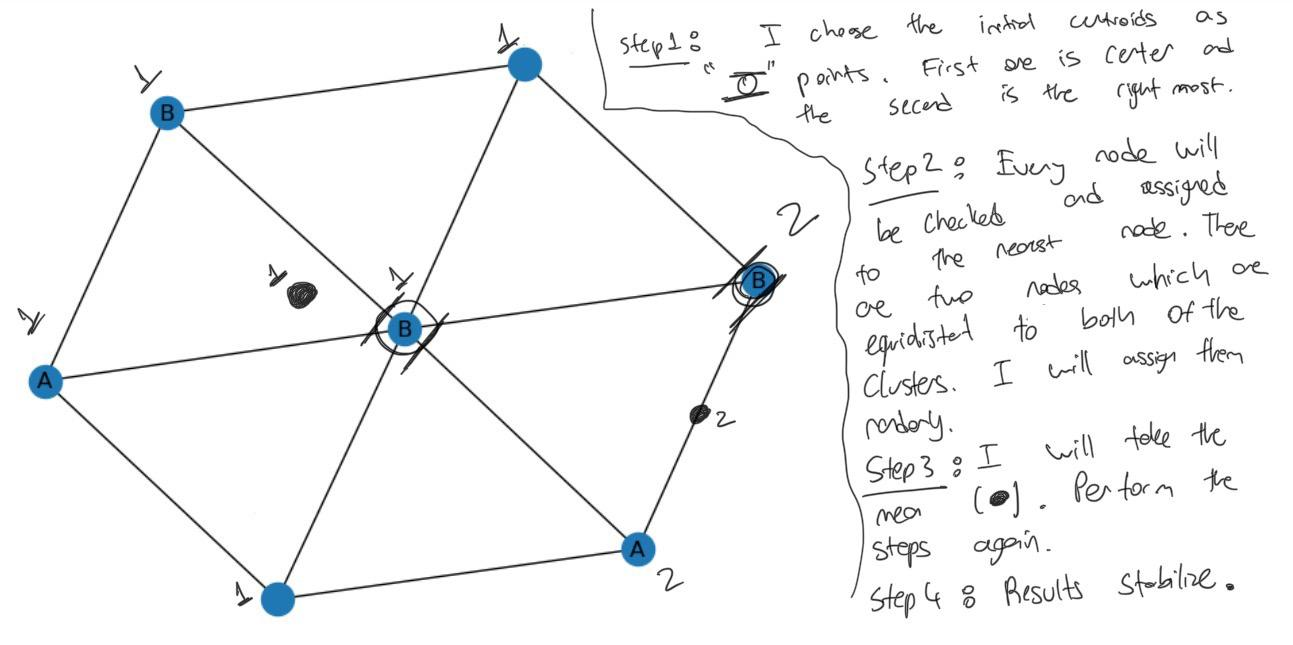

In [252]:
image_path = 'Photos/hw1_question1_4.jpg'
Image(filename=image_path)

This illustrates that we can get different results when we change the inital centroids. The mean points I drew are just approximations but at least it is easy to derive the distances and understand the results stabilize after the first run. 

## Q2

Consider the dataset:

In [183]:
image = loadmat(r'C:\Users\erent\OneDrive\2024-Bahar-ITU\git_projects\388E_data_science\Data\PaviaU.mat')['paviaU']
gt = loadmat(r'C:\Users\erent\OneDrive\2024-Bahar-ITU\git_projects\388E_data_science\Data\PaviaU_gt.mat')['paviaU_gt']

The dataset is a hyperspectral image collected by the ROSIS sensor over Pavia, nothern Italy. The image is 610 x 340 pixels, and the number of spectral bands is 103, but some of the samples in the images contain no information and have to be discarded before the analysis. Image groundtruth differentiates 9 classes.

* asphalt (1)
* meadows (2)
* gravel (3)
* trees (4)
* painted metal (5)
* soil (6)
* bitumen (7)
* bricks (8)
* shadows (9)

In [215]:
image.shape
gt.shape

(610, 340, 103)

(610, 340)

Notice that each pixel $(i,j)$ contains a 103-dimensional vector $p_{i,j}$.

In [187]:
i = randint(610)
j = randint(340)
image[i,j]

array([1111, 1117, 1109, 1190, 1306, 1442, 1493, 1473, 1449, 1514, 1565,
       1507, 1419, 1421, 1493, 1510, 1513, 1570, 1621, 1647, 1664, 1694,
       1689, 1697, 1716, 1729, 1764, 1805, 1816, 1848, 1851, 1864, 1907,
       1938, 1938, 1958, 1978, 1985, 1977, 1976, 1979, 1968, 1963, 1976,
       1998, 2002, 2004, 2006, 1996, 1993, 1998, 2010, 2008, 2015, 2021,
       2019, 2013, 2020, 2036, 2022, 2003, 2002, 1999, 1996, 2018, 2036,
       2015, 2018, 2052, 2070, 2081, 2089, 2120, 2133, 2144, 2172, 2185,
       2221, 2245, 2248, 2257, 2237, 2193, 2181, 2255, 2283, 2272, 2243,
       2234, 2244, 2265, 2248, 2216, 2221, 2246, 2233, 2205, 2228, 2224,
       2195, 2187, 2188, 2157], dtype=uint16)

We are going to write k-NN models to associate a class label 1 to 9 as above to the pixel in the image, and measure the accuracy of the model.

1. Split the dataset into train and test. Use 90% of the data for training, and the remaining 10% for test. We are going to use *accuracy* which is calculated the ration of the number of correctly labelled points by the total number of pixels.

2. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance
$ d((i,j),(i',j')) = max(|i-i'|,|j-j'|) $. Decide which $k$ yields the best result.

3. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance $d((i,j),(i',j')) = \| p_{i,j} - p_{i',j'} \|$ where $\|\cdot\|$ denotes the Euclidean norm of a vector. Decide which $k$ yields the best results.

## Q2 - Solutions

### Reshaping the Data and Discarding Samples with No Information

For this part, I relied on my chat gpt answer. I included my log in my files.

In [188]:
height, width, bands = image.shape
reshaped_image = np.reshape(image, (height * width, bands))
reshaped_gt = np.reshape(gt, (height * width,))
valid_indices = np.where(reshaped_gt != 0)[0]
image_valid = reshaped_image[valid_indices]
gt_valid = reshaped_gt[valid_indices]




### 1) Splitting to Test and Train Sets

In [191]:
X_train, X_test, y_train, y_test = train_test_split(image_valid, gt_valid, test_size=0.1, random_state=42)



Before I move on, I will define the two required distance metrics as two functions.

### Function for the First Metric:  𝑑((𝑖,𝑗),(𝑖′,𝑗′))=𝑚𝑎𝑥(|𝑖−𝑖′|,|𝑗−𝑗′|)

In [246]:
def custom_distance_metric1(pixel1, pixel2):
  
    
    return max(abs(pixel1[0] - pixel2[0]), abs(pixel1[1] - pixel2[1]))

### Function for the Second Metric:  𝑑((𝑖,𝑗),(𝑖′,𝑗′))=‖𝑝𝑖,𝑗−𝑝𝑖′,𝑗′‖

In [237]:

def custom_distance_metric(X, Y):
    
    
    return np.linalg.norm(X - Y, axis=-1)

I will write a function to evalute the knn algorithm for different k values. It will also input our custom distance metric. I will try the first one now. It will hopefully give me the respected accuracies.

### KNN Function

In [241]:
class_names = ['asphalt', 'meadows', 'gravel', 'trees', 'painted metal', 'soil', 'bitumen', 'bricks', 'shadows']

In [242]:


def knn_with_custom_k_values(X_train, X_test, y_train, y_test, k_values, custom_distance_metric):
    

    
    accuracies = {}
    reports = {}

    for k in k_values:
       
        knn_classifier = KNN(n_neighbors=k, metric=custom_distance_metric)

        
        knn_classifier.fit(X_train, y_train)

        
        y_pred = knn_classifier.predict(X_test)

        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[k] = accuracy

        
        report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
        reports[k] = report

    return accuracies, reports

### 2) Results for the First Metric: 𝑑((𝑖,𝑗),(𝑖′,𝑗′))=𝑚𝑎𝑥(|𝑖−𝑖′|,|𝑗−𝑗′|)

In [247]:
k_values = [1, 3, 5, 7]


accuracies, reports = knn_with_custom_k_values(X_train, X_test, y_train, y_test, k_values, custom_distance_metric1)


print("Accuracies:")
for k, accuracy in accuracies.items():
    print(f"  k={k}: {accuracy}")


print("Classification Reports:")
for k, report in reports.items():
    print(f"  k={k}:")
    print(report)

Accuracies:
  k=1: 0.3810191678354371
  k=3: 0.4506778868630201
  k=5: 0.484455352968677
  k=7: 0.49789621318373073
Classification Reports:
  k=1:
{'asphalt': {'precision': 0.25705794947994054, 'recall': 0.26015037593984963, 'f1-score': 0.2585949177877429, 'support': 1330.0}, 'meadows': {'precision': 0.5900269541778975, 'recall': 0.5874932903918412, 'f1-score': 0.5887573964497042, 'support': 3726.0}, 'gravel': {'precision': 0.16666666666666666, 'recall': 0.1571753986332574, 'f1-score': 0.16178194607268465, 'support': 439.0}, 'trees': {'precision': 0.12984822934232715, 'recall': 0.12479740680713128, 'f1-score': 0.12727272727272726, 'support': 617.0}, 'painted metal': {'precision': 0.9264705882352942, 'recall': 0.9368029739776952, 'f1-score': 0.9316081330868761, 'support': 269.0}, 'soil': {'precision': 0.12118226600985221, 'recall': 0.12361809045226131, 'f1-score': 0.12238805970149254, 'support': 995.0}, 'bitumen': {'precision': 0.05434782608695652, 'recall': 0.057034220532319393, 'f1-sc

Accuracies are quite low for what I expected. This is a clear indication that the metric I defined is not good to be used for this task.  

Another take is, model accuracy increased as I increased the "k" values altough we don't see large jumps after k=3.  

It took more than an hour to run this code.


### 3) Results for the Second Metric:  𝑑((𝑖,𝑗),(𝑖′,𝑗′))=‖𝑝𝑖,𝑗−𝑝𝑖′,𝑗′‖

In [243]:
k_values = [1, 3, 5, 7]


accuracies, reports = knn_with_custom_k_values(X_train, X_test, y_train, y_test, k_values, custom_distance_metric)


print("Accuracies:")
for k, accuracy in accuracies.items():
    print(f"  k={k}: {accuracy}")


print("Classification Reports:")
for k, report in reports.items():
    print(f"  k={k}:")
    print(report)

Accuracies:
  k=1: 0.9010051425899953
  k=3: 0.9095371669004207
  k=5: 0.9084852734922861
  k=7: 0.9095371669004207
Classification Reports:
  k=1:
{'asphalt': {'precision': 0.9366197183098591, 'recall': 0.9, 'f1-score': 0.9179447852760736, 'support': 1330.0}, 'meadows': {'precision': 0.9233144621718992, 'recall': 0.9629629629629629, 'f1-score': 0.9427220178665264, 'support': 3726.0}, 'gravel': {'precision': 0.7296703296703296, 'recall': 0.7562642369020501, 'f1-score': 0.7427293064876958, 'support': 439.0}, 'trees': {'precision': 0.9686956521739131, 'recall': 0.9027552674230146, 'f1-score': 0.9345637583892618, 'support': 617.0}, 'painted metal': {'precision': 1.0, 'recall': 0.9962825278810409, 'f1-score': 0.9981378026070763, 'support': 269.0}, 'soil': {'precision': 0.8460674157303371, 'recall': 0.75678391959799, 'f1-score': 0.7989389920424402, 'support': 995.0}, 'bitumen': {'precision': 0.7619047619047619, 'recall': 0.8517110266159695, 'f1-score': 0.8043087971274686, 'support': 263.0}, 

Before I share my thoughts on the result, I want to say that it took a lot more than I expected for the function to stop running. I think it took 4 hours, which may mean that it took 1 hour for each k values. 

Compared to the previous one, this metric did a great job at capturing the correct labels.

Accuracies didn't change a lot with different k values. Still, the lowest seems to be when k=1 and the highest ones are k=3 and k=7. Like I said, there is a slight difference.

## Q3

Consider [Individual household electric power consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) dataset from the UCI data repository:

1. Clean the data. You may replace the missing values with 0.
2. Apply k-means algorithm to the data with $k=2,3,4,5$.
3. Project the data to the 2-dimensional plane using Linear Discriminant Analysis as I did in the class, with the labels you obtained in step 2 above.
4. Inspect the data with the labels you constructed in step 2. Do these clusters have a visible meaning? Analyze.

## Q3 - Solutions

In [100]:
electric = fetch_ucirepo(id=235) 

C:\Users\erent\anaconda3\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [101]:
X = electric['data']['features'].iloc[:,2:]
X
X.info()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 110.8+ MB


First look of the data and the columns showed me that they don't have the data types they supposed to have. I will address this issue in cleaning step.

## 1) Cleaning the Data

### Missing Value Handling

Before I handle missing values, I read the documentation of the [dataset](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) carefully. It mentions that an example for missing values can be seen looking at the date "April 28, 2007". Well, I created another dataframe, this time including "date" for this, just to see those missing values.

In [77]:
Whole_data = electric['data']['features']

Whole_data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [78]:
Whole_data['Date'] = pd.to_datetime(Whole_data['Date'],dayfirst=True)

In [79]:
Whole_data.query("Date == '2007-04-28'")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
190476,2007-04-28,00:00:00,1.368,0.086,233.050,5.800,0.000,1.000,0.0
190477,2007-04-28,00:01:00,1.370,0.086,233.220,5.800,0.000,1.000,0.0
190478,2007-04-28,00:02:00,1.372,0.088,233.570,5.800,0.000,2.000,0.0
190479,2007-04-28,00:03:00,1.370,0.086,233.400,5.800,0.000,1.000,0.0
190480,2007-04-28,00:04:00,1.368,0.086,233.250,5.800,0.000,1.000,0.0
...,...,...,...,...,...,...,...,...,...
191911,2007-04-28,23:55:00,?,?,?,?,?,?,NaN
191912,2007-04-28,23:56:00,?,?,?,?,?,?,NaN
191913,2007-04-28,23:57:00,?,?,?,?,?,?,NaN
191914,2007-04-28,23:58:00,?,?,?,?,?,?,NaN


Now I know that missing datas are both represented as "?" and Nan. I will act accordingly in my own dataset. I will replace "?" to NaN first.

In [102]:
X.replace('?', pd.NA, inplace=True)




In [103]:
X.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Now I have what I need. I will replace those 25979 values to "0" as I was instructed.

In [104]:
X.fillna(0, inplace=True)
X.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Changing the Data Types

I will try converting the features to the right format.

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


For some reasons, the datatypes of these continous variables are "object". I will change that before I continue. 

In [113]:
X[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2"]] = X[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2"]].astype(float)

### Scaling the Data 

This is the part where I stopped to think the most. I knew that I needed to scale the data if I wanted to use a distance metric like "euclidian". However, I believe I also had some other options which are less sensitive to unscaled features: such as manhattan distance.

First, I will be looking at the data to decide whether they are on the same scale.

In [115]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [116]:
X.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000
mean,1.078,0.122,237.825,4.570,1.108,1.282,6.378
std,1.058,0.113,26.970,4.446,6.116,5.787,8.415
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.304,0.046,238.890,1.400,0.000,0.000,0.000
50%,0.578,0.100,240.960,2.600,0.000,0.000,1.000
75%,1.520,0.192,242.860,6.400,0.000,1.000,17.000
max,11.122,1.390,254.150,48.400,88.000,80.000,31.000


array([[<Axes: title={'center': 'Global_active_power'}>,
        <Axes: title={'center': 'Global_reactive_power'}>,
        <Axes: title={'center': 'Voltage'}>],
       [<Axes: title={'center': 'Global_intensity'}>,
        <Axes: title={'center': 'Sub_metering_1'}>,
        <Axes: title={'center': 'Sub_metering_2'}>],
       [<Axes: title={'center': 'Sub_metering_3'}>, <Axes: >, <Axes: >]],
      dtype=object)

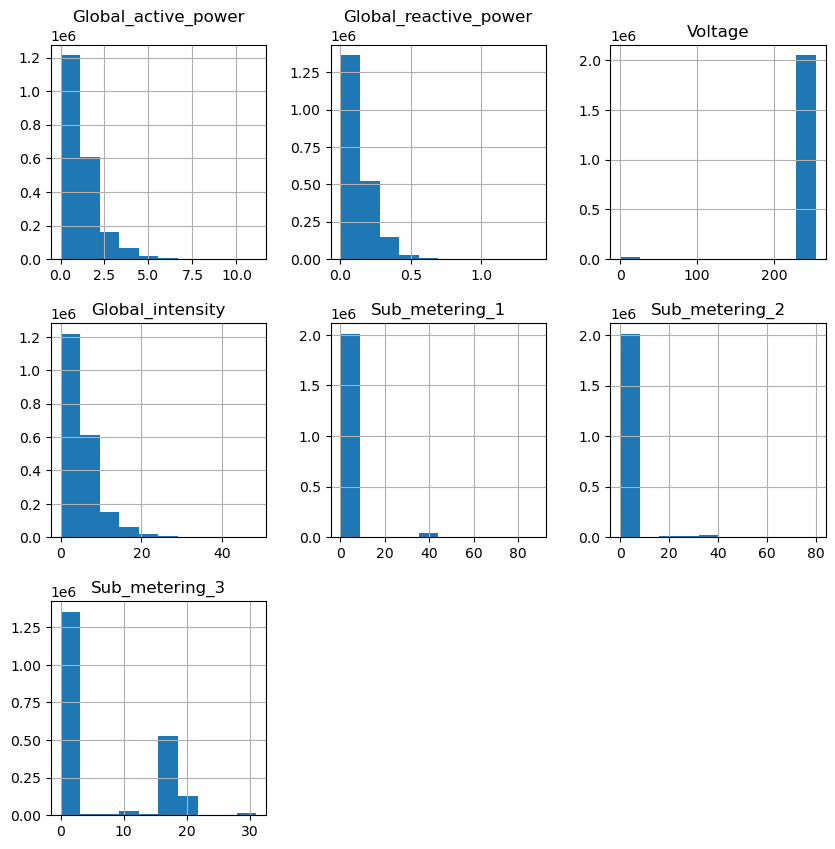

In [129]:
X.hist(figsize=(10, 10))


It was easy to see that they were not sharing similar scales. I will go on with performing standartization.

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2-3) Performing Clustering and LDA

I wrote this code with the help of the code we went through at class.

In [151]:
def apply_kmeans_with_lda(k, X):
    
        model = KMeans(n_clusters=k,n_init='auto')
        labels = model.fit_predict(X)


        projection = LinearDiscriminantAnalysis(n_components=2)
        res = projection.fit_transform(X, labels)


        plt.figure(figsize=(8, 8))
        plt.scatter(res[:, 0], res[:, 1], c=labels, alpha=0.8)
        plt.title('Clustering Visualization using LDA')
        plt.xlabel('LDA Component 1')
        plt.ylabel('LDA Component 2')
        plt.colorbar(label='Cluster')
        plt.show()
    
        return labels

First I will try the non scaled dataset.

### Unscaled Set

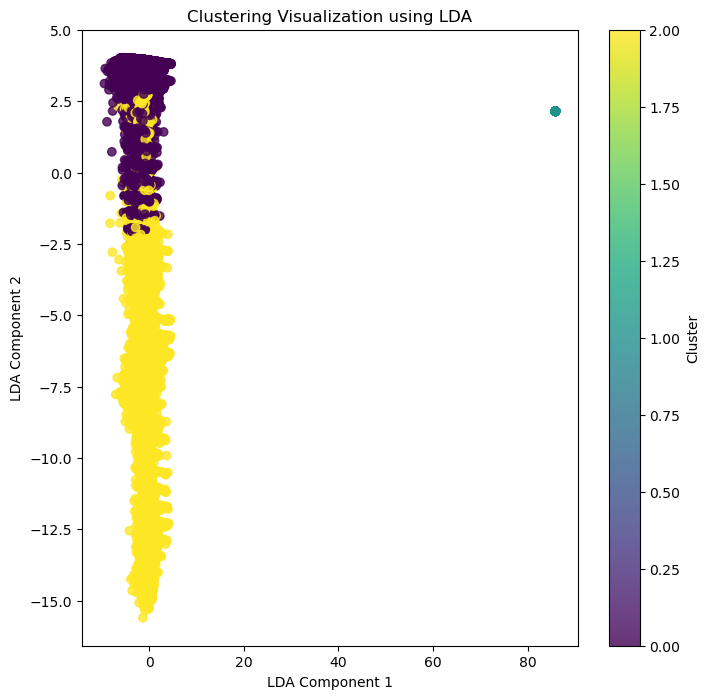

array([2, 2, 2, ..., 0, 0, 0])

In [152]:
apply_kmeans_with_lda(3,X)

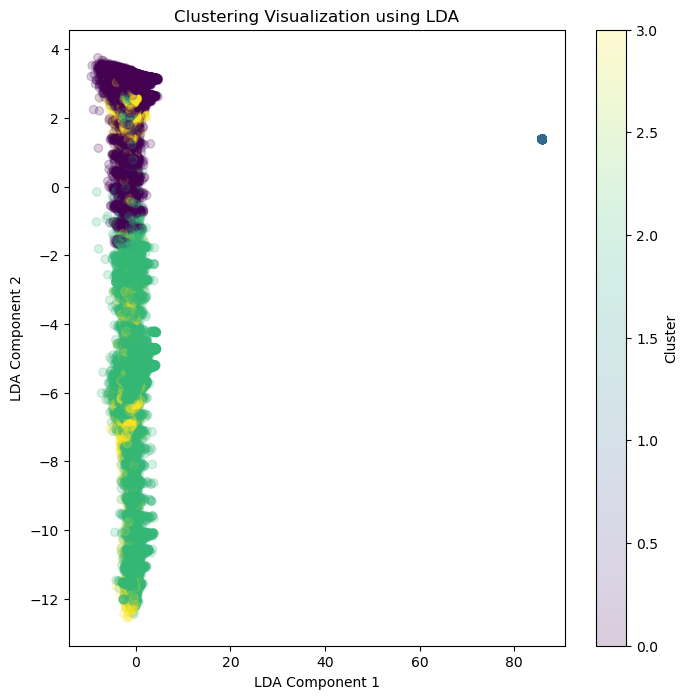

array([2, 2, 2, ..., 0, 0, 0])

In [145]:
apply_kmeans_with_lda(4,X)

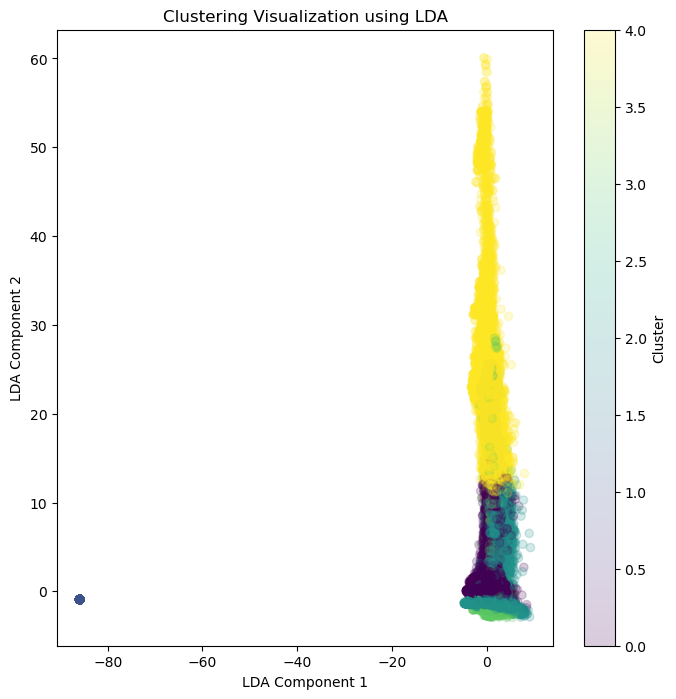

array([0, 0, 0, ..., 2, 2, 2])

In [146]:
apply_kmeans_with_lda(5,X)

### Scaled

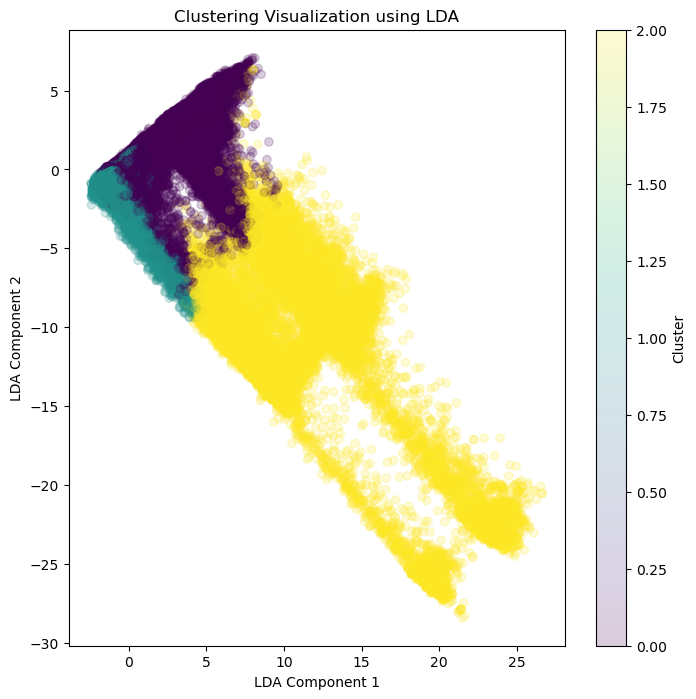

array([0, 0, 0, ..., 1, 1, 1])

In [148]:
apply_kmeans_with_lda(3,X_scaled)

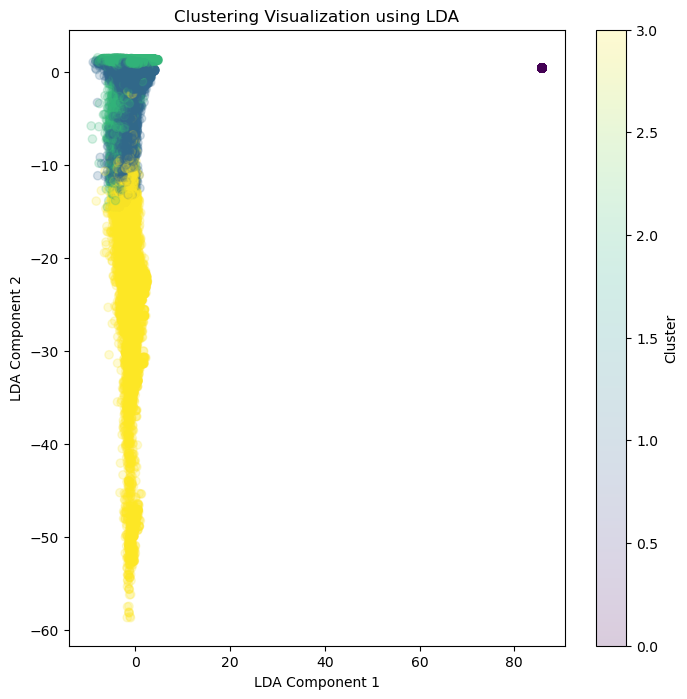

array([1, 1, 1, ..., 2, 2, 2])

In [149]:
apply_kmeans_with_lda(4,X_scaled)

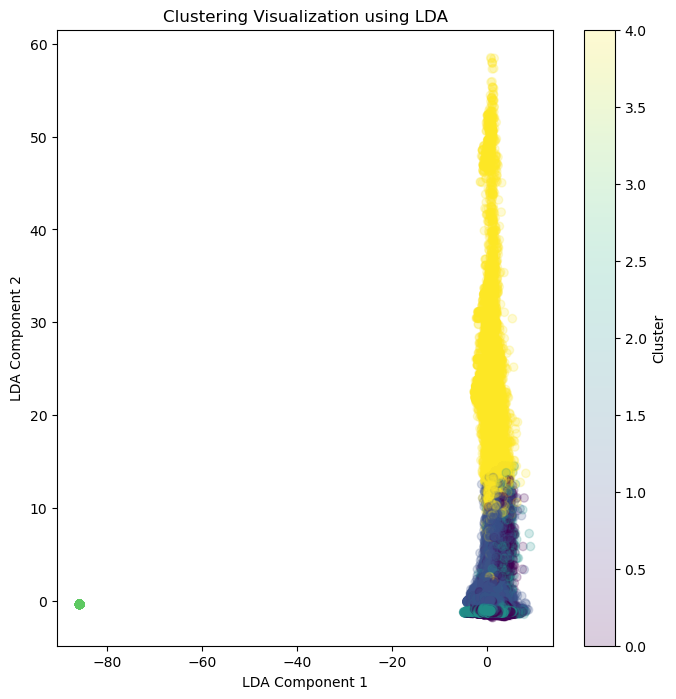

array([1, 1, 1, ..., 2, 2, 2])

In [150]:
apply_kmeans_with_lda(5,X_scaled)

### 4) Trying to Understand

For this part of the task, I will define my k as 2 and try to understand why these labels were assigned.

In [154]:
def apply_kmeans(k, X):
    
        model = KMeans(n_clusters=k,n_init='auto')
        labels = model.fit_predict(X)


    
        return labels

In [155]:
labels=apply_kmeans(2,X_scaled)

In [158]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [159]:
x_to_use=X.copy()
x_to_use["labels"]=labels

In [160]:
x_to_use

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,labels
0,4.216,0.418,234.840,18.400,0.000,1.000,17.000,1
1,5.360,0.436,233.630,23.000,0.000,1.000,16.000,1
2,5.374,0.498,233.290,23.000,0.000,2.000,17.000,1
3,5.388,0.502,233.740,23.000,0.000,1.000,17.000,1
4,3.666,0.528,235.680,15.800,0.000,1.000,17.000,1
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.000,0
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.000,0
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.000,0
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.000,0


In [163]:
x_to_use.groupby("labels").size()

labels
0    1293994
1     781265
dtype: int64

My initial feeling tells me that the reasons which set these these labels are also correlated with date. It seems as if the earliest days are mostly labeled 1 and the recent ones are 0. 

I wanted to see the descriptive statistics of them in order to gain more insight. I will check  both of the labels indivualy.

In [165]:
x_to_use[x_to_use["labels"]==1].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,labels
count,781265.000,781265.000,781265.000,781265.000,781265.000,781265.000,781265.000,781265.000
mean,2.121,0.143,239.451,8.900,2.883,2.777,16.060,1.000
std,1.013,0.131,3.178,4.343,9.701,9.175,5.883,0.000
min,0.856,0.000,223.200,3.600,0.000,0.000,0.000,1.000
25%,1.418,0.054,237.640,5.800,0.000,0.000,17.000,1.000
50%,1.714,0.104,239.600,7.200,0.000,0.000,18.000,1.000
75%,2.518,0.210,241.470,10.600,0.000,1.000,18.000,1.000
max,11.122,1.390,253.270,48.400,88.000,80.000,31.000,1.000


In [166]:
x_to_use[x_to_use["labels"]==0].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,labels
count,1293994.000,1293994.000,1293994.000,1293994.000,1293994.000,1293994.000,1293994.000,1293994.000
mean,0.448,0.110,236.843,1.955,0.036,0.380,0.532,0.000
std,0.348,0.098,34.028,1.470,0.345,0.853,1.374,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.246,0.000,239.930,1.000,0.000,0.000,0.000,0.000
50%,0.334,0.098,241.700,1.400,0.000,0.000,0.000,0.000
75%,0.488,0.174,243.460,2.200,0.000,1.000,1.000,0.000
max,2.118,1.092,254.150,10.000,21.000,22.000,15.000,0.000


I believe some of these features played key roles thanks to their differences when they were being clustered. There are also some which didn't show much differences in two different clusters.  

For example, Global Reactive Power and Voltage seemed to stay similar in both clusters. There are no huge differences in their means in terms of proportions.  

Other features seem to have quite varying values in two different cluster. I believe that might mean that they were the key features resulting in this labeling.

